In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.drawing.nx_agraph import graphviz_layout

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


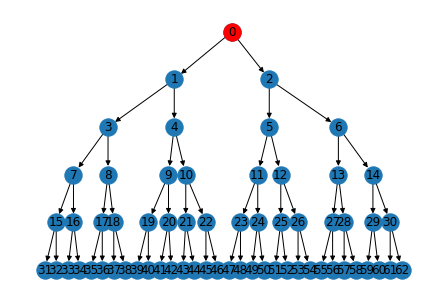

In [2]:
#Create a regular tree with set offspring factor and height above the root, with edges directed away from root.
offspring_factor=2
height=5
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
#In case we want to look at metrics other than Hamming
def metric(*args):
    return rw.hamming_dist(*args)

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


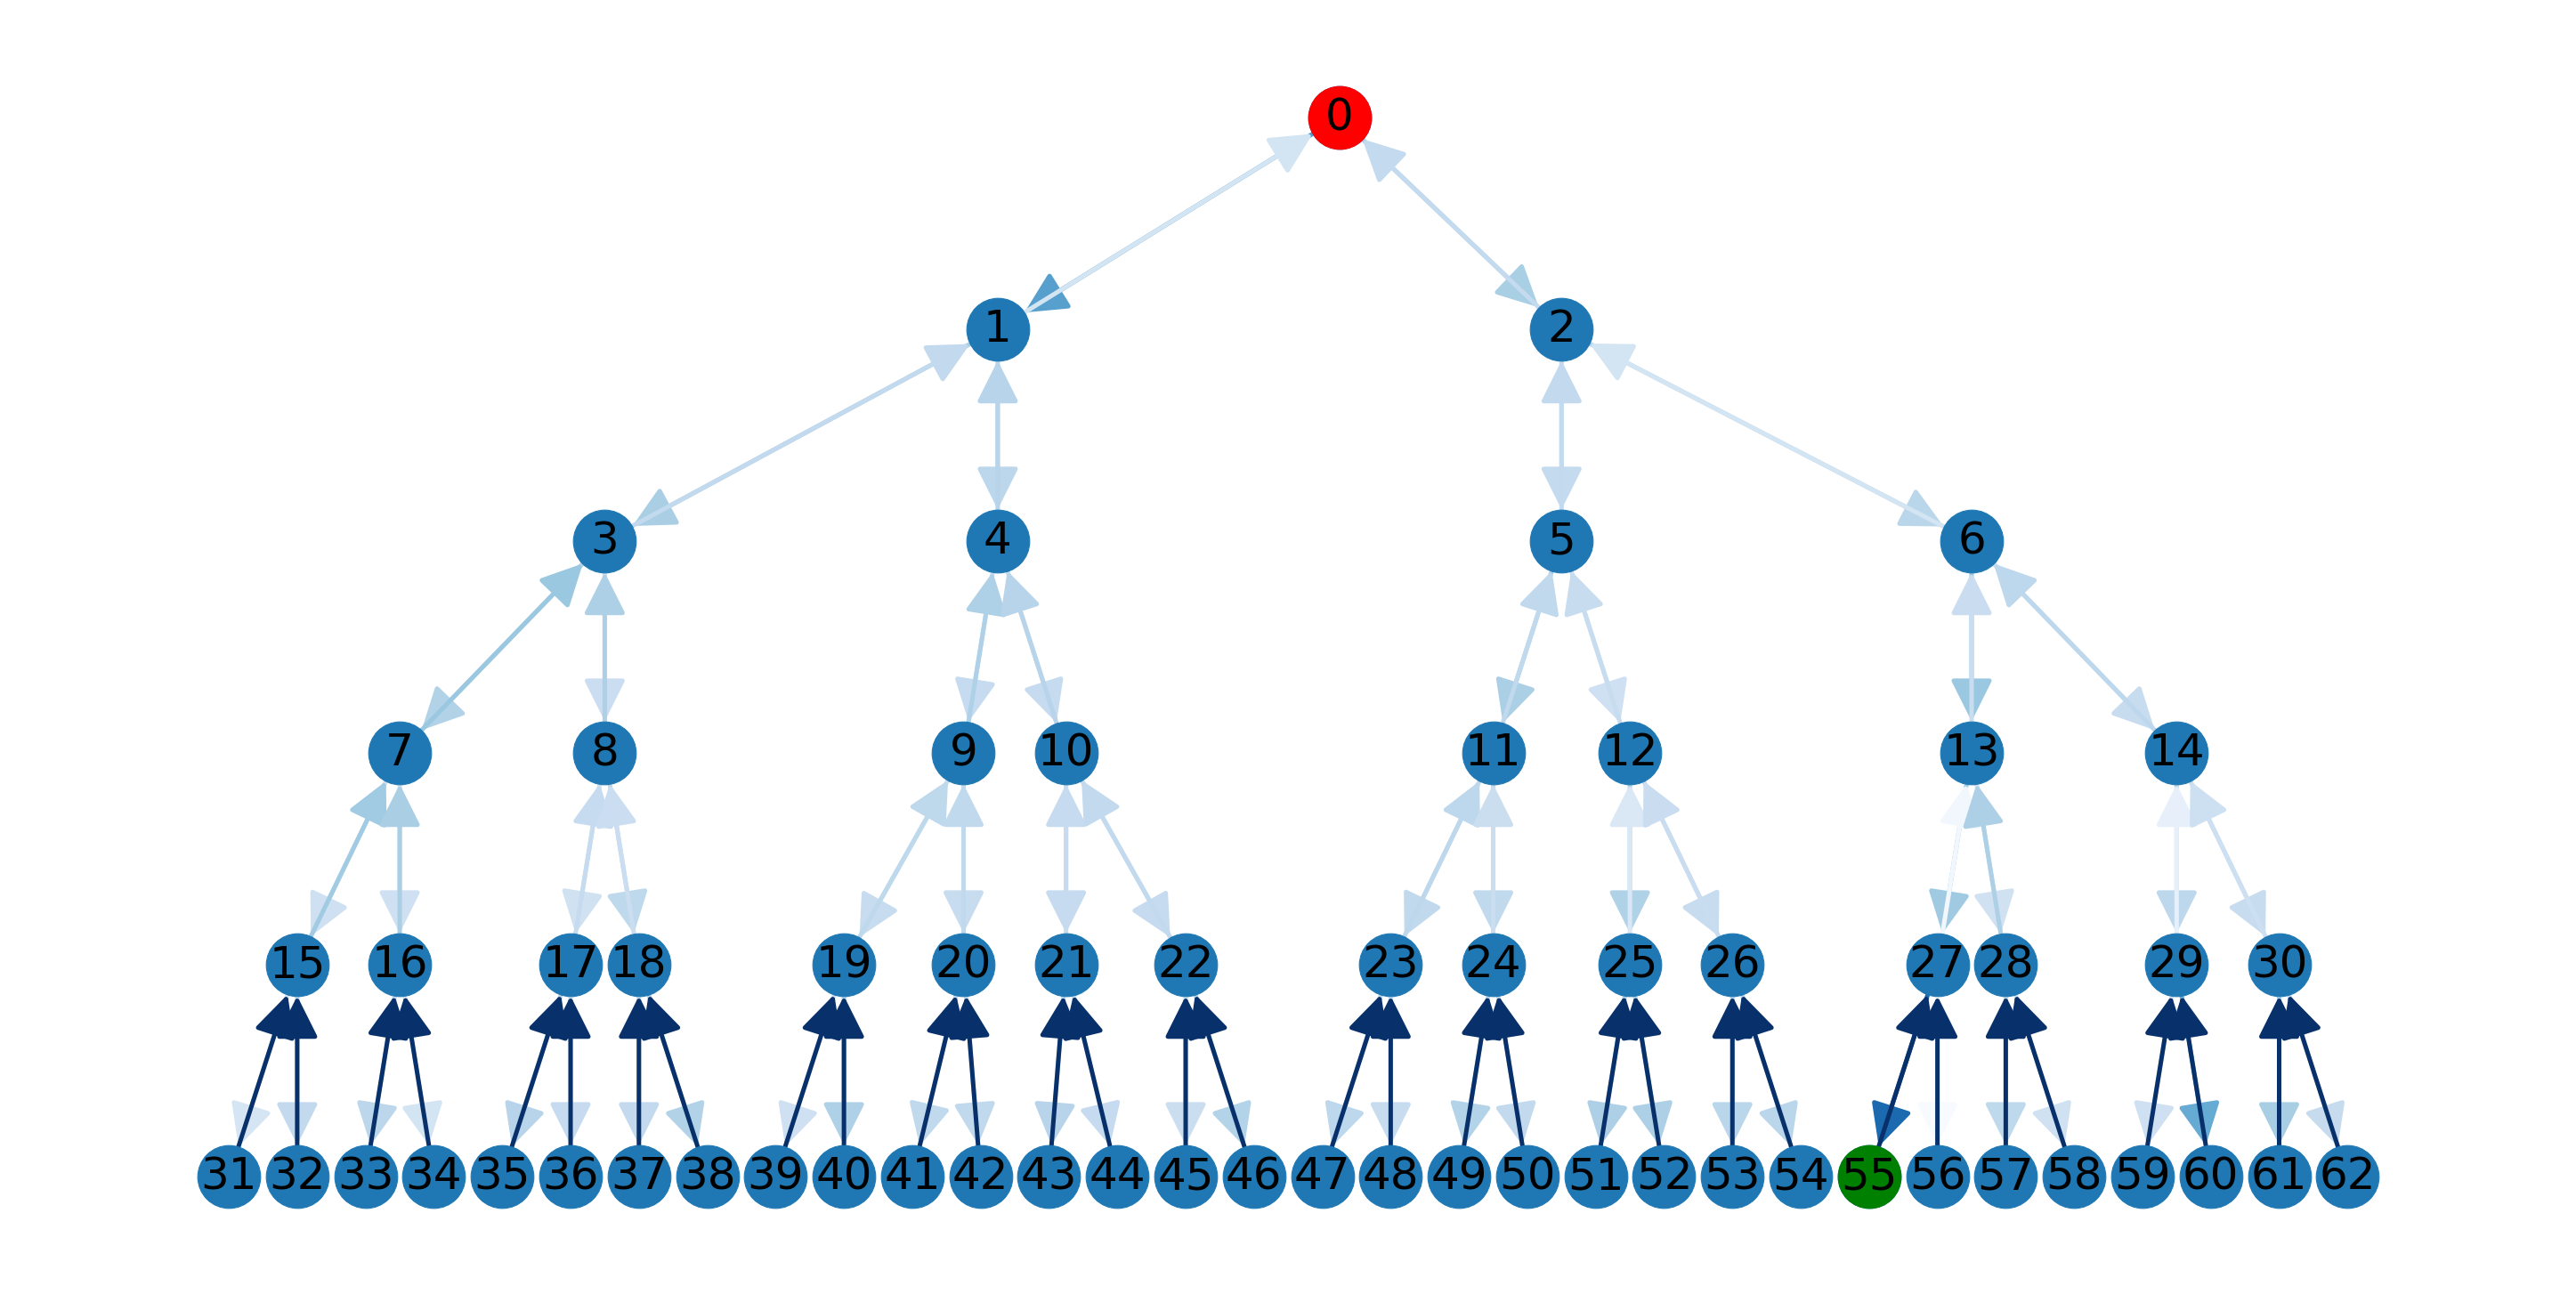

In [5]:
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #Bit flipping rate for propagating patterns
G=rw.patternWalker(H,root,pattern_len,flip_rate,metric=metric)
G.set_weights()
#pos=graphviz_layout(G,prog='dot') #Positions can be taken from H
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(40,20))
nx.draw(G, pos, edgelist=edges, edge_color=weights, node_size=5000,arrowsize=100,width=5.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(H,pos,font_size=50)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g',node_size=5000)
plt.savefig('./outputs/demonstrations/tree.png')
plt.show()

In [6]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts_root_leaves=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
print('target node:', G.target_node)
mfpts_root_leaves

Number of duplicate strings/Number of strings: 0 / 63
target node: 55


{(0, 31): (604.4786873997446+0j),
 (0, 32): (546.4836229800318+0j),
 (0, 33): (526.8514297896219+0j),
 (0, 34): (584.846494209335+0j),
 (0, 35): (554.872836255343+0j),
 (0, 36): (572.4470982007114+0j),
 (0, 37): (494.5489170696627+0j),
 (0, 38): (480.4895075133667+0j),
 (0, 39): (637.2887360307803+0j),
 (0, 40): (584.5659501946751+0j),
 (0, 41): (602.0265757764001+0j),
 (0, 42): (602.0265757764009+0j),
 (0, 43): (552.9018260996677+0j),
 (0, 44): (568.7186618504987+0j),
 (0, 45): (584.735497601328+0j),
 (0, 46): (553.1018260996656+0j),
 (0, 47): (862.8735631828079+0j),
 (0, 48): (882.2052513227093+0j),
 (0, 49): (823.3061464989636+0j),
 (0, 50): (842.6378346388743+0j),
 (0, 51): (893.2288586545308+0j),
 (0, 52): (893.2288586545326+0j),
 (0, 53): (1050.2156971070788+0j),
 (0, 54): (1050.215697107078+0j),
 (0, 55): (409.64629345397196+0j),
 (0, 56): (508.06216034800724+0j),
 (0, 57): (613.6113042139831+0j),
 (0, 58): (652.274680493782+0j),
 (0, 59): (662.0223559028001+0j),
 (0, 60): (609.

In [7]:
#Now, get MFPT for all pairs (root, node)
mfpts_root_all={}
for branch in G.hierarchy_backup.successors(G.root):
    mfpts_root_all[branch]=utils.mfpt(G,[(root,b) for b in nx.descendants(G.hierarchy_backup,branch)])

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


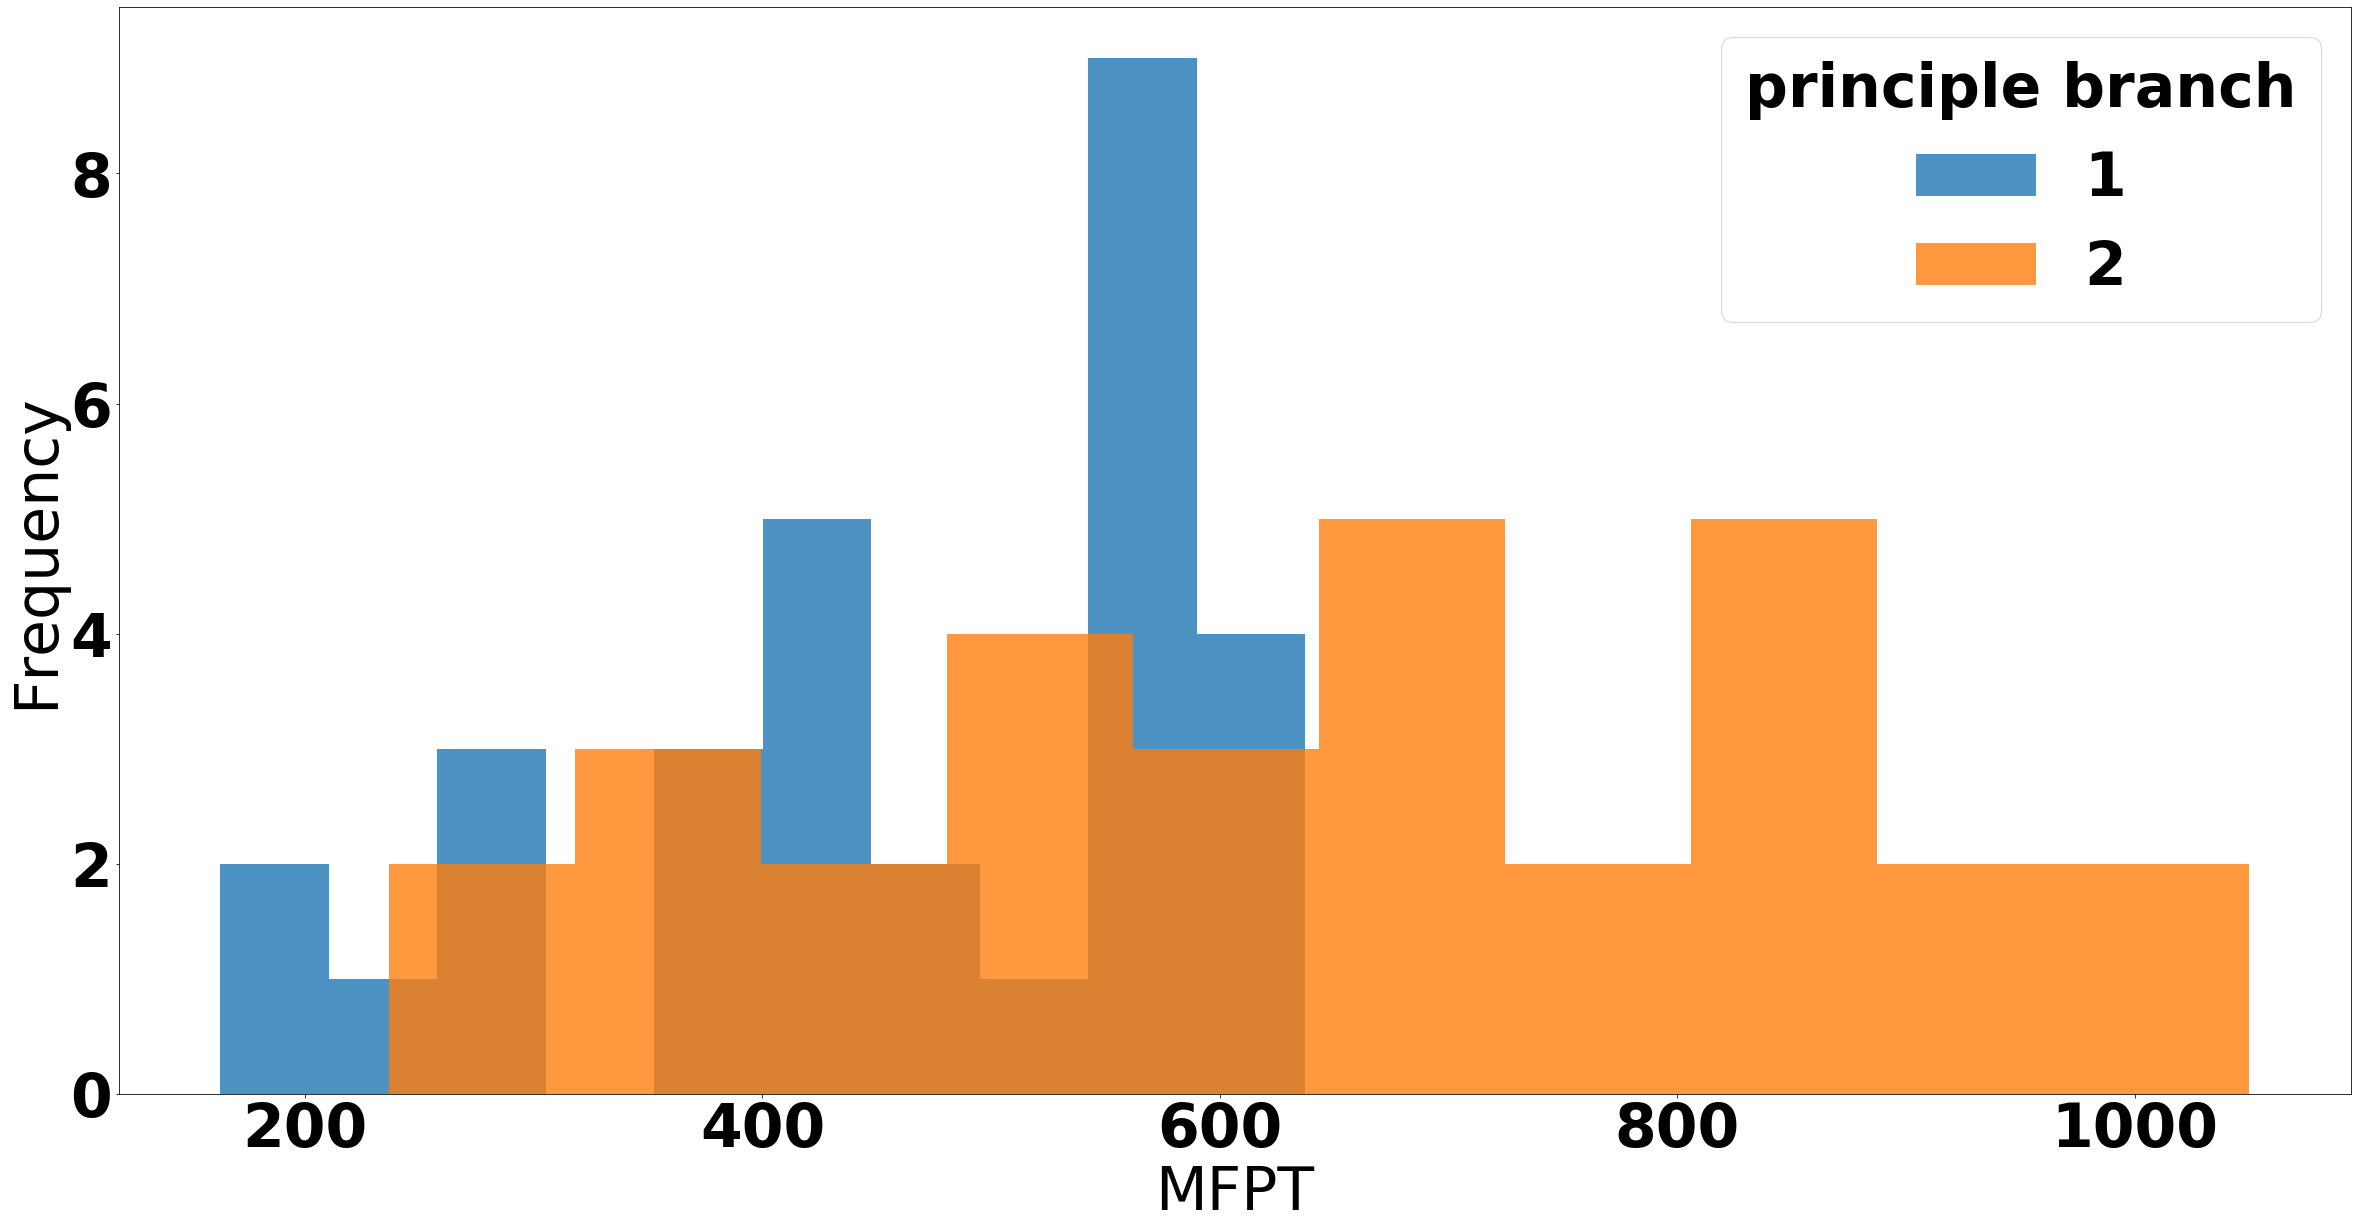

In [8]:

plt.figure(figsize=(40,20))

for branch in G.hierarchy_backup.successors(G.root):
    _=plt.hist(mfpts_root_all[branch].values(),label=str(branch),alpha=0.8)
plt.legend(loc='best', title='principle branch')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.savefig('./outputs/demonstrations/hist_mfpts.png')
plt.show()

In [9]:
#We can also sample over a number realisations of patterns
mfpts_root_leaves_sampling=[]
down_c=[] #downward "current"
up_c=[] #upward "current"
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    for x in t_temp.values():
        mfpts_root_leaves_sampling.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)
down_c=np.array(down_c)
up_c=np.array(up_c)

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


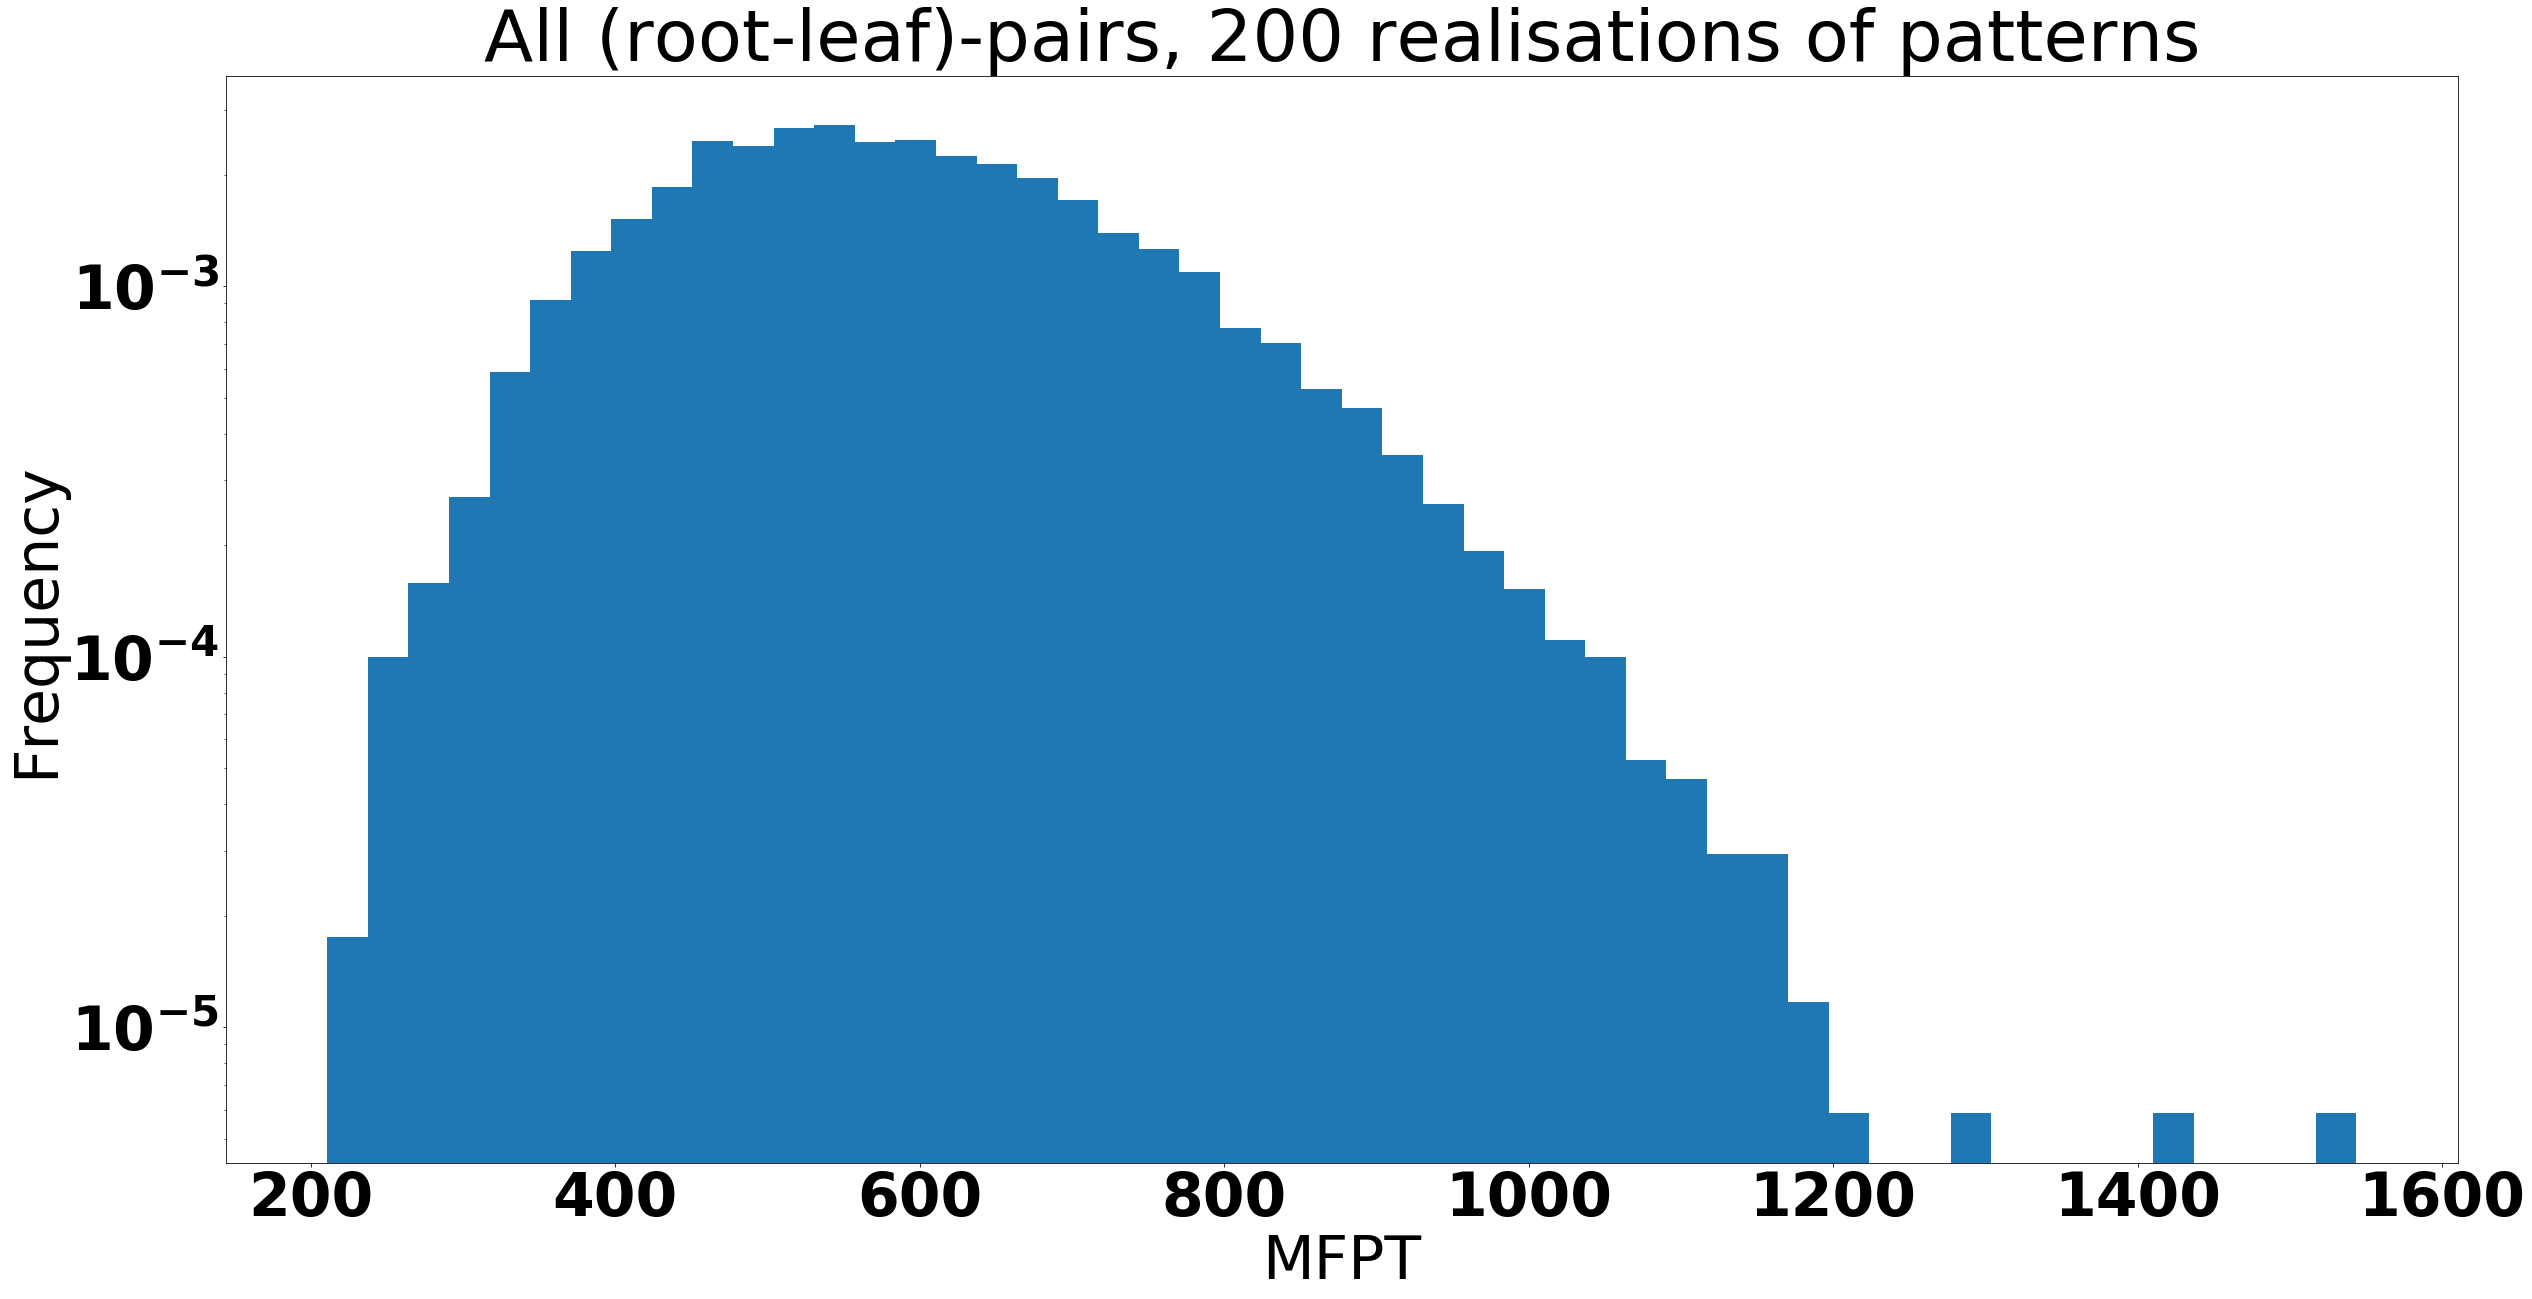

In [10]:
plt.figure(figsize=(40,20))
_=plt.hist(mfpts_root_leaves_sampling,bins=50,density=True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_mfpts.png')
plt.show()

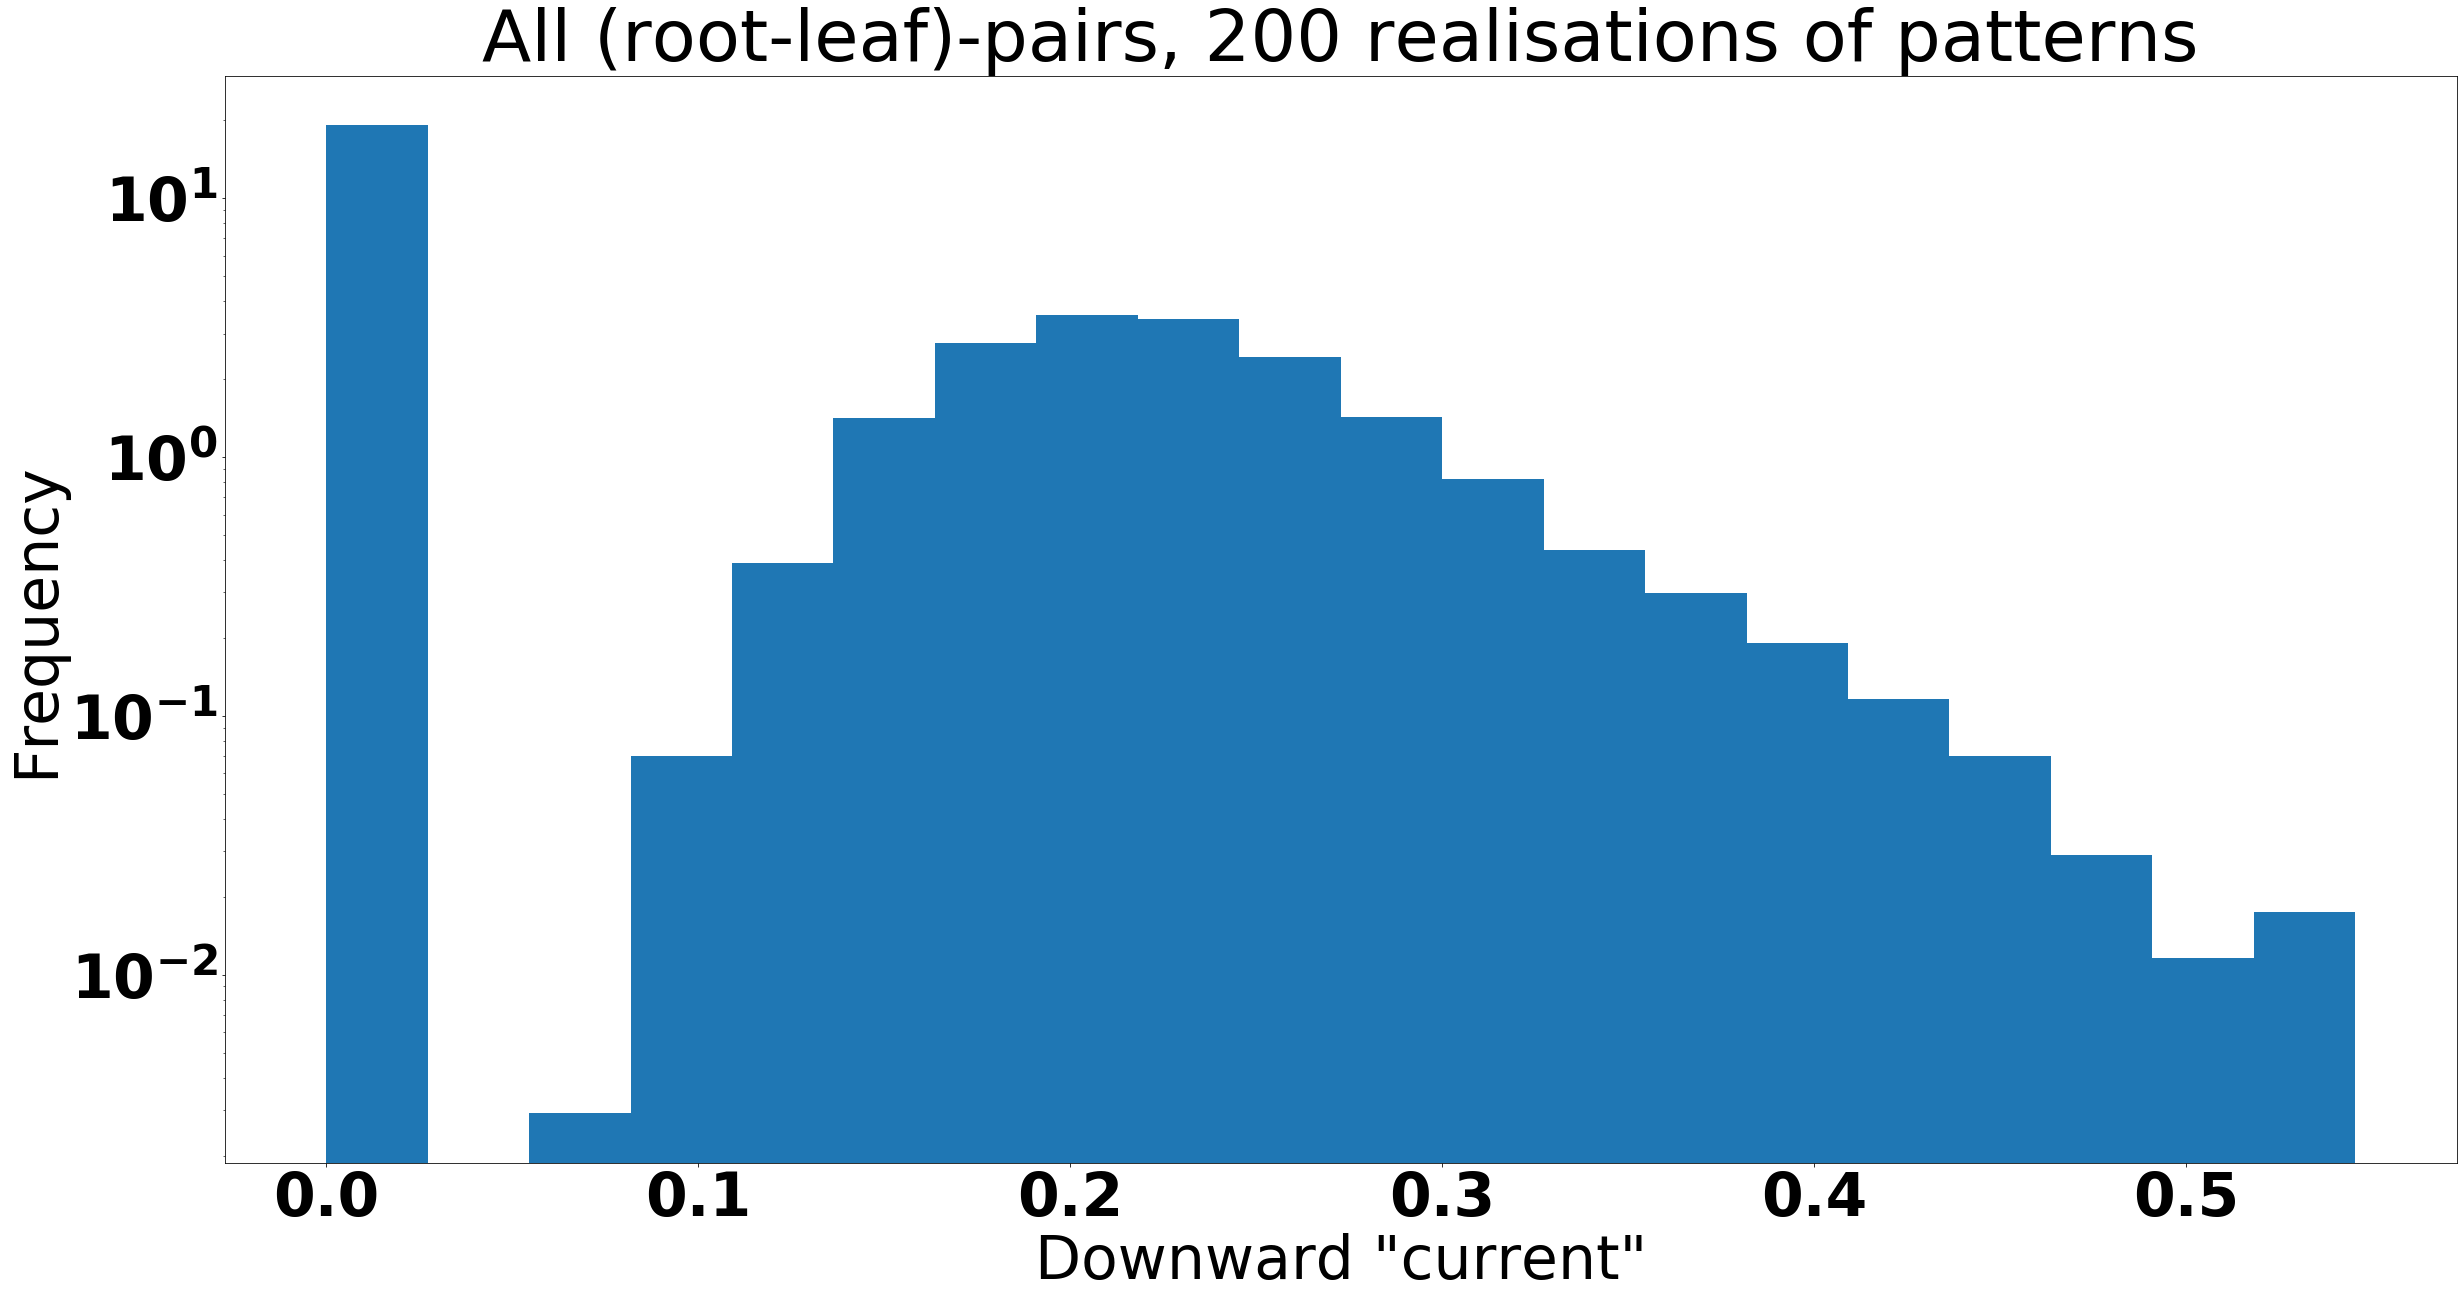

In [11]:
plt.figure(figsize=(40,20))
_=plt.hist(down_c,bins=20,density=True)
plt.xlabel('Downward "current"')
plt.ylabel('Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_down_c.png')
plt.show()

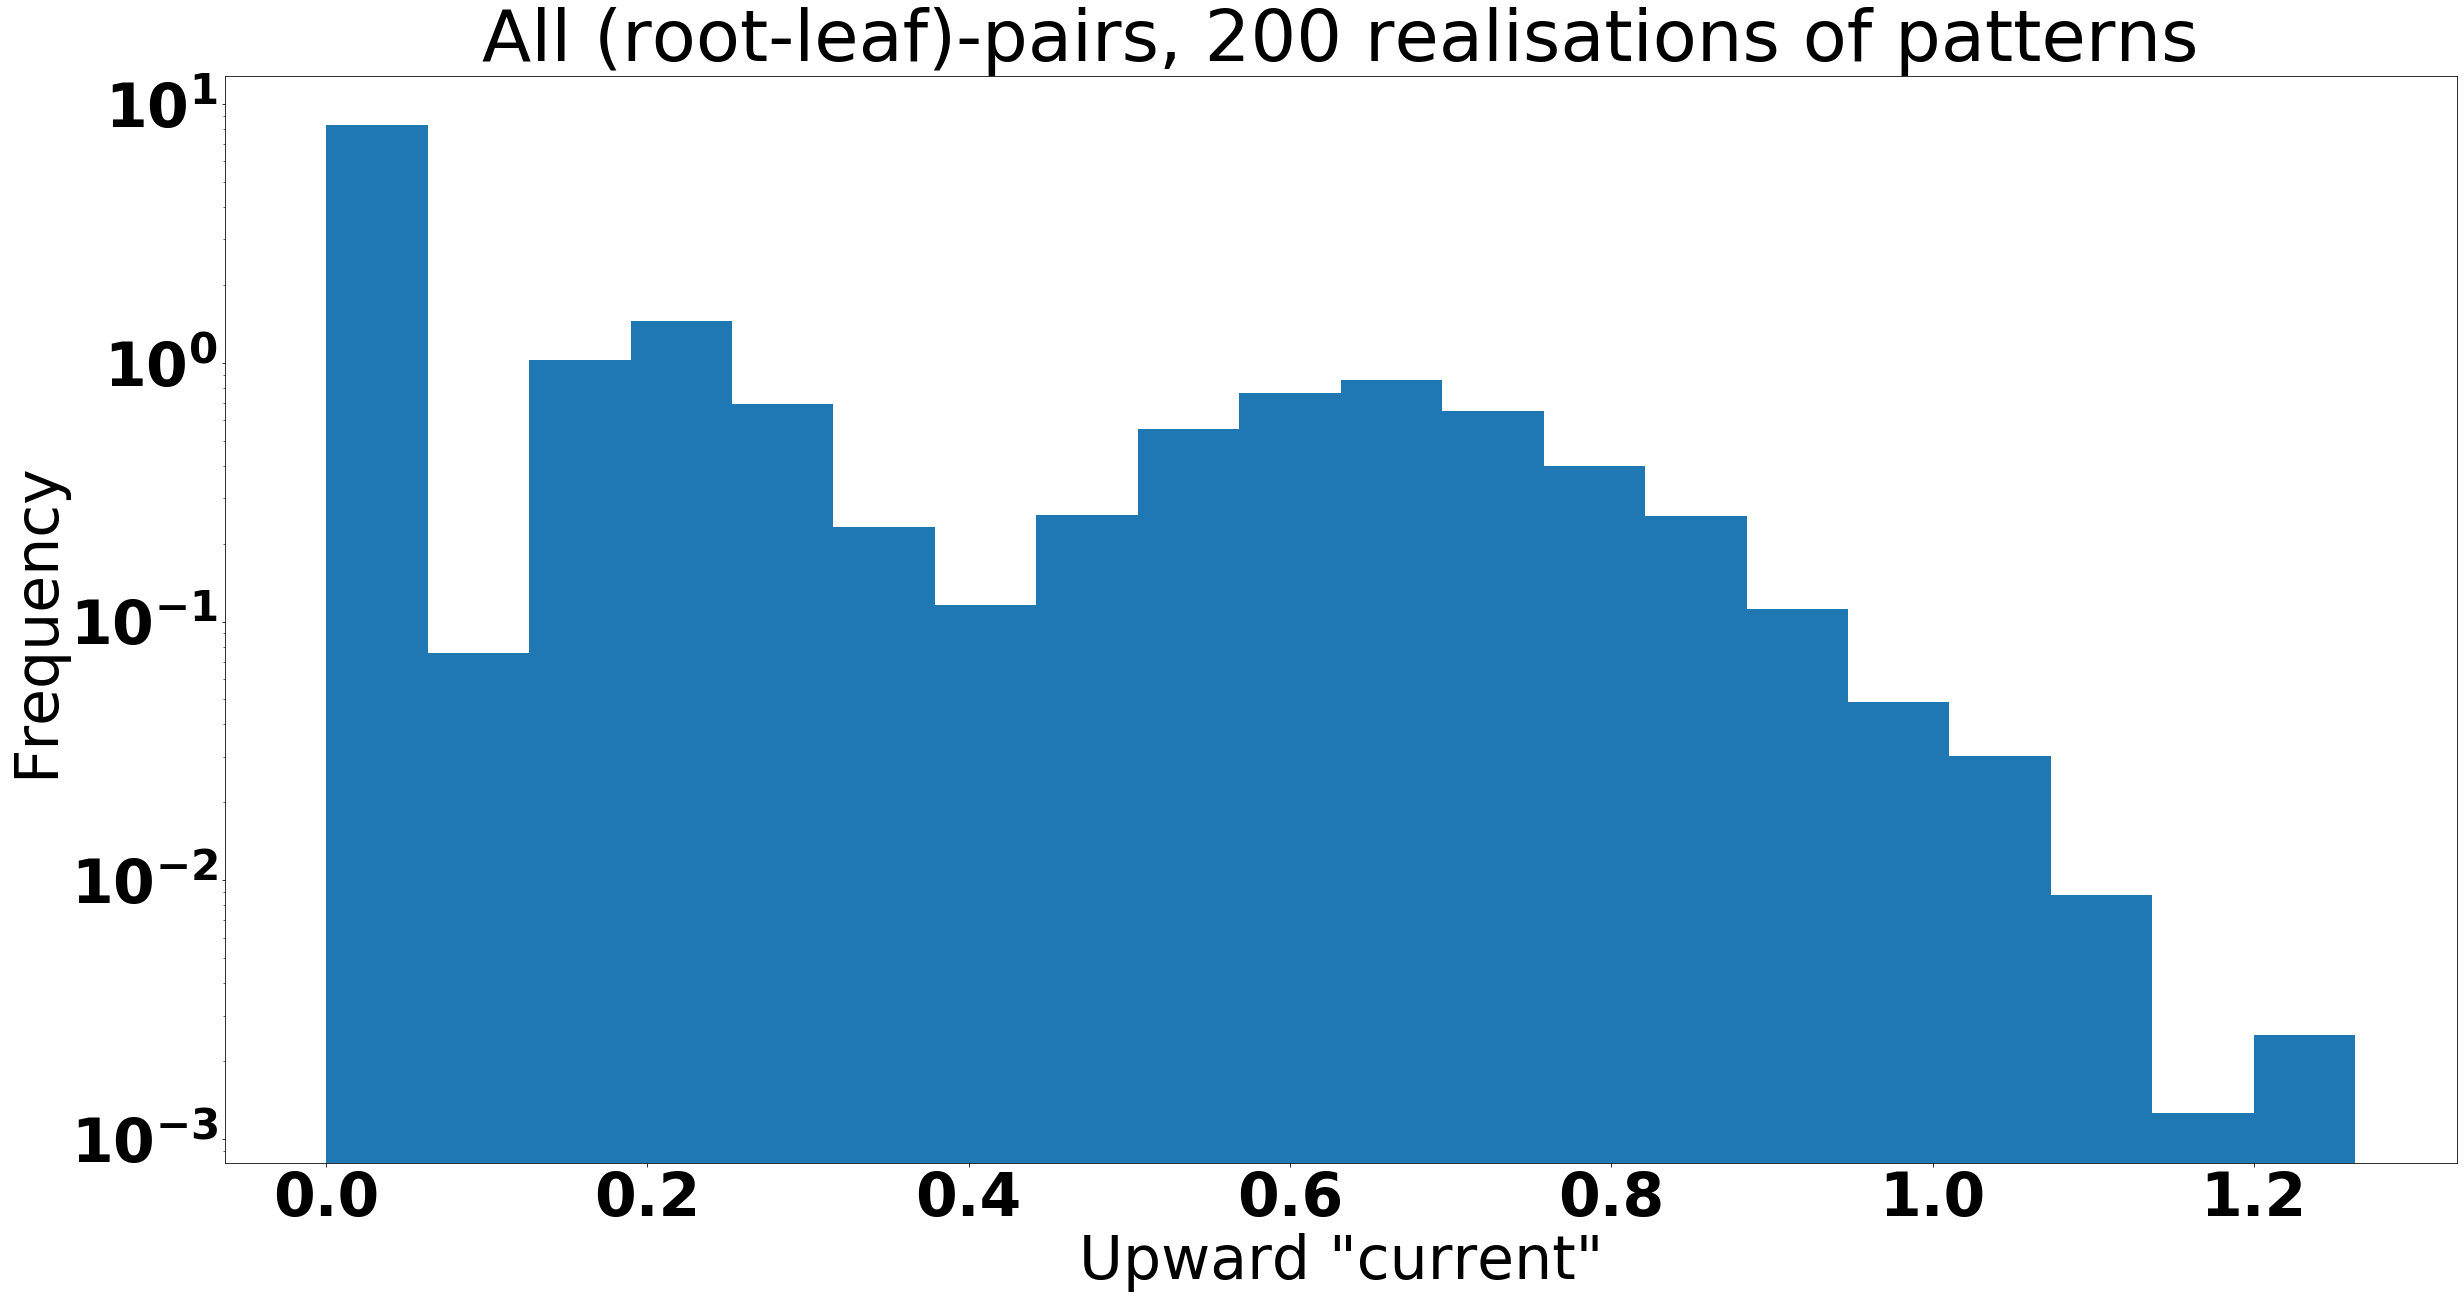

In [12]:
plt.figure(figsize=(40,20))
_=plt.hist(up_c,bins=20,density=True)
plt.xlabel('Upward "current"')
plt.ylabel('Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_up_c.png')
plt.show()

In [13]:
#This indexing is not alright!

root_block=[0]
first_block=[1]+[x for x in nx.descendants(G.hierarchy_backup,1)]
second_block=[2]+[x for x in nx.descendants(G.hierarchy_backup,2)]
blocking=np.array(root_block+first_block+second_block)

M=utils.normalised_laplacian(G)[blocking]
M=M[:,blocking]

In [14]:
#Needed to see if a certain formula for the MP inverse of the normalised graph Laplacian holds true.

A=M[root_block,root_block]
B=np.squeeze(np.array(M[root_block,len(root_block):]))
C=np.squeeze(np.array(M[len(root_block):,root_block]))
D1=M[len(root_block):len(root_block+first_block),len(root_block):len(root_block+first_block)]
D2=M[len(root_block+first_block):,len(root_block+first_block):]

D=np.zeros((len(D1)+len(D2),len(D1)+len(D2)))
D[:len(D1),:len(D1)]=D1
D[len(D1):,len(D1):]=D2

a=np.linalg.pinv(A)
F=D-np.matmul(C,B)
f=np.linalg.pinv(F)

m=np.zeros(M.shape)
m[0,0]=1+np.matmul(np.matmul(B,f), C)
m[0,1:]=-np.matmul(B,f)
m[1:,0]=-np.matmul(f,C)
m[1:,1:]=f
print(m)
print(np.linalg.norm(m-np.linalg.pinv(M)))

[[ 1.37183871  0.40140824  0.07501309 ... -0.05665374 -0.05153038
  -0.04289848]
 [ 0.40140824  2.21360269  1.97109699 ... -1.25991271 -1.25274104
  -1.00664223]
 [ 0.07501309  1.97109699  4.99751043 ... -1.96577228 -1.95458272
  -1.57060833]
 ...
 [-0.05665374 -1.25991271 -1.96577228 ...  5.40168773  3.18680657
   2.55286248]
 [-0.05153038 -1.25274104 -1.95458272 ...  3.18680657  5.41632806
   3.53868571]
 [-0.04289848 -1.00664223 -1.57060833 ...  2.55286248  3.53868571
   3.8354492 ]]
10.59444842807213


/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values 

In [15]:
#root_block=[0]
first_block=[0,1]+[x for x in nx.descendants(G.hierarchy_backup,1)]
second_block=[2]+[x for x in nx.descendants(G.hierarchy_backup,2)]
blocking=np.array(first_block+second_block)

M=utils.normalised_laplacian(G)[blocking]
M=M[:,blocking]

#Needed to see if a certain formula for the MP inverse of the normalised graph Laplacian holds true.

A=M[first_block,first_block]
B=np.zeros((len(first_block),len(second_block))) #np.squeeze(np.array(M[first_block,len(first_block):]))
C=np.squeeze(np.array(M[len(first_block):,first_block]))
#D1=M[len(root_block):len(root_block+first_block),len(root_block):len(root_block+first_block)]
D=M[len(first_block):,len(first_block):]

a=np.linalg.pinv(A)
F=D-np.matmul(C,B)
f=np.linalg.pinv(F)

m=np.zeros(M.shape)
m[:len(first_block),:len(first_block)]=1+np.matmul(np.matmul(B,f), C)
m[:len(first_block),len(first_block):]=-np.matmul(B,f)
m[len(first_block):,:len(first_block)]=-np.matmul(f,C)
m[len(first_block):,len(first_block):]=f
print(m)
print(np.linalg.norm(m-np.linalg.pinv(M)))

[[ 1.          1.          1.         ... -0.         -0.
  -0.        ]
 [ 1.          1.          1.         ... -0.         -0.
  -0.        ]
 [ 1.          1.          1.         ... -0.         -0.
  -0.        ]
 ...
 [ 0.84341346 -0.         -0.         ...  6.69135802  4.4691358
   3.58328035]
 [ 0.84341346 -0.         -0.         ...  4.4691358   6.69135802
   4.56323824]
 [ 0.67623519 -0.         -0.         ...  3.58328035  4.56323824
   4.65873016]]
170.26547986972457


/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
